In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from math import exp
from scipy.optimize import leastsq
def graph(formula, x_range):
    x = np.array(x_range)
    y = eval(formula)
    plt.plot(x, y)
    plt.xscale('log')
    plt.show

* A = 0.0482
* B = 1.16
* C = 159
* D = 2.39

4-parameter logistic equation. A, B, C, and D were generated by Softmax Pro.
Y = D + (A - D)/(1 + (x/C)^B). A = lower asymptote, B = inflection point, C = slope, D = upper asymptote

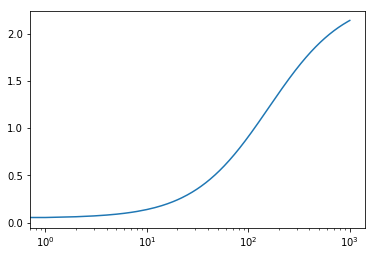

In [2]:
graph('2.39 + (0.0482 - 2.39)/(1 + (x/159)**1.16)', range(0, 1000))

* 0, 0.047
* 13, 0.175
* 52, 0.552
* 210, 1.408
* 840, 2.093

In [3]:
x = [0.001, 13, 52, 210, 840]
y = [0.047, 0.175, 0.552, 1.408, 2.093]

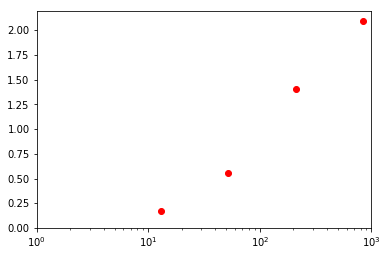

In [4]:
plt.plot(x, y, 'ro')
plt.xscale('log')
plt.axis([1, 1000, 0, 2.2])
plt.show()

    I think the first thing I need to do is try to learn how to draw a best fit line when the X is on logarithmic scale, and when the X and Y axis' are both on a logarithmic scale. This is probably a good first aproximation.


[  4.87564686e-02   1.15527848e+00   1.59016895e+02   2.39218101e+00]


/usr/local/lib/python3.4/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


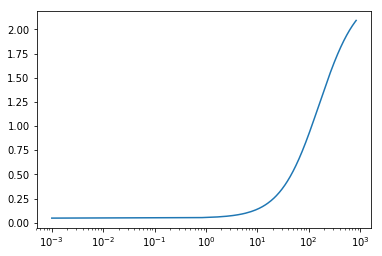

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#def graph(formula, x_range):
#    x = np.array(x_range)
#    y = formula(x)
#    plt.plot(x, y)
#    plt.xscale('log')
#    plt.show

def logistic4(x, A, B, C, D):
    """4PL logistic equation."""
    return D + (A-D)/(1 + (x/C)**B)

def residuals(p, y, x):
    """Deviations of data from fitted 4PL curve"""
    A,B,C,D = p
    err = y-logistic4(x, A, B, C, D)
    return err

x = [0.001, 13, 52, 210, 840]
y = [0.047, 0.175, 0.552, 1.408, 2.093]

# Initial guess for parameters
p0 = [y[0], 0.01, 0.01, y[-1]]

# Fit equation using least squares optimization
popt, pcov = curve_fit(logistic4, x, y)#, p0)

print(popt)

xCont = np.linspace(min(x), max(x), 1000)
fittedData=[logistic4(xVal, *popt) for xVal in xCont]


fig1 = plt.figure(1)
plt.xscale('log')
ax=fig1.add_subplot(1,1,1)
ax.plot(xCont, fittedData)

#graph(logistic4, range(0, 1000))

# Plot results
#plt.plot(x,y, 'ro')
#plt.title('Least-squares 4PL fit to noisy data')
#plt.legend(['Fit', 'Noisy', 'True'], loc='upper left')
#for i, (param, actual, est) in enumerate(zip('ABCD', [A,B,C,D], plsq[0])):
#    plt.text(10, 3-i*0.5, '%s = %.2f, est(%s) = %.2f' % (param, actual, param, est))

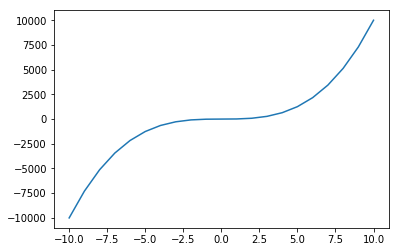

In [13]:
import numpy as np  
import matplotlib.pyplot as plt  

def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  # <- note now we're calling the function 'formula' with x
    plt.plot(x, y)  
    plt.show()  

def my_formula(x):
    z = 10
    return z*x**3+2*x-4

graph(my_formula, range(-10, 11))

[  9.73367195e+01   9.86853716e+01  -7.99827891e-03]
[[  7.28014130e+00   5.55658116e+00   1.59027635e-03]
 [  5.55658116e+00   9.87606726e+00   5.14102604e-04]
 [  1.59027635e-03   5.14102604e-04   6.21028849e-07]]


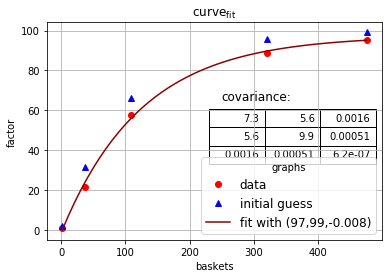

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
from scipy.optimize import curve_fit #we could import more, but this is what we need
###defining your fitfunction
def func(x, a, b, c):
    return a - b* np.exp(c * x) 
###OP's data
baskets = np.array([475, 108, 2, 38, 320])
scaling_factor = np.array([95.5, 57.7, 1.4, 21.9, 88.8])
###let us guess some start values
initialGuess=[100, 100,-.01]
guessedFactors=[func(x,*initialGuess ) for x in baskets]
###making the actual fit
popt,pcov = curve_fit(func, baskets, scaling_factor,initialGuess)
#one may want to
print(popt)
print(pcov)
###preparing data for showing the fit
basketCont=np.linspace(min(baskets),max(baskets),50)
fittedData=[func(x, *popt) for x in basketCont]
###preparing the figure
fig1 = plt.figure(1)
ax=fig1.add_subplot(1,1,1)
###the three sets of data to plot
ax.plot(baskets,scaling_factor,linestyle='',marker='o', color='r',label="data")
ax.plot(baskets,guessedFactors,linestyle='',marker='^', color='b',label="initial guess")
ax.plot(basketCont,fittedData,linestyle='-', color='#900000',label="fit with ({0:0.2g},{1:0.2g},{2:0.2g})".format(*popt))
###beautification
ax.legend(loc=0, title="graphs", fontsize=12)
ax.set_ylabel("factor")
ax.set_xlabel("baskets")
ax.grid()
ax.set_title("$\mathrm{curve}_\mathrm{fit}$")
###putting the covariance matrix nicely
tab= [['{:.2g}'.format(j) for j in i] for i in pcov]
the_table = plt.table(cellText=tab,
                  colWidths = [0.2]*3,
                  loc='upper right', bbox=[0.483, 0.35, 0.5, 0.25] )
plt.text(250,65,'covariance:',size=12)
###putting the plot
plt.show()
###done